In [4]:
# Read data from Java SOMToolbox
import numpy as np
from SOMToolBox_Parse import SOMToolBox_Parse
'''idata = SOMToolBox_Parse("datasets\\iris\\iris.vec").read_weight_file()
weights = SOMToolBox_Parse("datasets\\iris\\iris.wgt.gz").read_weight_file()
classes = SOMToolBox_Parse("datasets\\iris\\iris.cls").read_weight_file()'''

idata = SOMToolBox_Parse("datasets\\animals\\animals.vec").read_weight_file()
weights = SOMToolBox_Parse("datasets\\animals\\animals.wgt.gz").read_weight_file()
classes = SOMToolBox_Parse("datasets\\animals\\animals.cls").read_weight_file()


In [8]:
from somtoolbox import SOMToolbox

sm = SOMToolbox(weights=weights['arr'],m=weights['ydim'],n=weights['xdim'],
                dimension=weights['vec_dim'], input_data=idata['arr'],
               classes=classes['arr'], component_names=classes['classes_names'])
sm._mainview

features = ["small", "medium", "big", "2_legs", "4_legs", "hair", "hooves", "mane", "feathers", "hunt", "run", "fly", "swim"]

In [9]:
# Use any library for training SOM map (e.x. MiniSOM, SOMOClu, SOMpy, PopSOM etc.)
from somtoolbox import SOMToolbox
from minisom import MiniSom    


som = MiniSom(5, 5, 13, sigma=0.3, learning_rate=0.6)
data = idata['arr']
som.train(data, 10000)

sm = SOMToolbox(weights=som._weights.reshape(-1, 13), m=5, n=5, dimension=13, input_data=data)
sm._mainview

Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↩')
                [4] Button(name='↪')
                [5] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=12, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

In [10]:
print(len(som.get_weights()))
print(som.win_map(data))


5
defaultdict(<class 'list'>, {(0, 3): [array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.]), array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]), array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.]), array([1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.]), array([1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.]), array([0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.])], (2, 4): [array([0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.]), array([0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.]), array([0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.])], (1, 4): [array([1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.]), array([0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.])], (3, 4): [array([0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.]), array([0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.]), array([0., 0., 

In [21]:
mapped_info = som.win_map(data,return_indices=True)

defaultdict(<class 'list'>, {(0, 3): [0, 1, 2, 3, 4, 5, 6], (2, 4): [7, 8, 9], (1, 4): [10, 11, 12], (3, 4): [13, 14, 15]})


In [30]:
from collections import defaultdict
our_features = []
data = idata['arr']
weights = som.get_weights()

def def_value():
    return 0

featuresPlot = defaultdict(def_value)

for i in range(0,5):
    for j in range(0,5):
        error = np.zeros(13)
        for field in mapped_info[i,j]:
            error += np.abs(data[field]-weights[i][j])
        if(np.sum(error) > 0):
            featuresPlot[(i,j)] = features[np.argmin(error)]
print(featuresPlot[0,1])

0


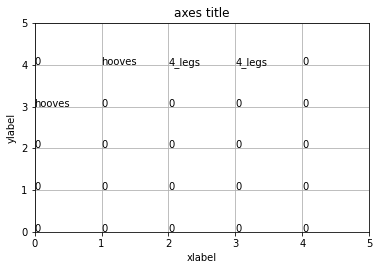

In [35]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 5, 0, 5])

for i in range(0,5):
    for j in range(0,5):
        ax.text(i, j, featuresPlot[i,j])
plt.grid()
plt.show()